## Import Libraries

In [1]:
import requests  
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns

In [2]:
# Get api keys from key file
from api_keys import client_id, client_secret

## Create zip code DF

In [3]:
zipCSVPath = '../../data/Zip_Code_Data.csv'
zipDF = pd.read_csv(zipCSVPath)
zipDF.head()

,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
0,90021,34.030124,-118.241779,44.0,Los Angeles,2945,11.3,5.7,88.7,86.8,...,38.4,35.2,1734,171,9.9,9.0,91.0,21635,Quintile 1,25.4
1,90058,34.001842,-118.221127,9.0,Los Angeles,2718,41.1,10.4,58.9,53.1,...,58.1,25.3,706,336,47.6,12.0,88.0,21964,Quintile 1,40.9
2,90013,34.046022,-118.246250,2.0,Los Angeles,12559,3.2,5.5,96.8,96.1,...,36.5,40.6,7308,256,3.5,7.8,92.2,22316,Quintile 1,20.2
3,90007,34.028334,-118.285077,4.0,Los Angeles,42433,14.2,38.3,85.8,69.4,...,48.4,25.1,11919,2213,18.6,12.3,87.7,27406,Quintile 1,41.6
4,90037,34.003494,-118.287097,1.0,Los Angeles,67640,27.8,11.0,72.2,67.8,...,49.8,32.2,17699,6455,36.5,24.1,75.9,35424,Quintile 1,51.4


### Create dataframe for LA zip/census data only

In [4]:
laDF = zipDF[zipDF.City=="Los Angeles"]

laDF.head()

,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
0,90021,34.030124,-118.241779,44.0,Los Angeles,2945,11.3,5.7,88.7,86.8,...,38.4,35.2,1734,171,9.9,9.0,91.0,21635,Quintile 1,25.4
1,90058,34.001842,-118.221127,9.0,Los Angeles,2718,41.1,10.4,58.9,53.1,...,58.1,25.3,706,336,47.6,12.0,88.0,21964,Quintile 1,40.9
2,90013,34.046022,-118.246250,2.0,Los Angeles,12559,3.2,5.5,96.8,96.1,...,36.5,40.6,7308,256,3.5,7.8,92.2,22316,Quintile 1,20.2
3,90007,34.028334,-118.285077,4.0,Los Angeles,42433,14.2,38.3,85.8,69.4,...,48.4,25.1,11919,2213,18.6,12.3,87.7,27406,Quintile 1,41.6
4,90037,34.003494,-118.287097,1.0,Los Angeles,67640,27.8,11.0,72.2,67.8,...,49.8,32.2,17699,6455,36.5,24.1,75.9,35424,Quintile 1,51.4


### Create dataframe for Sacramento zip/census data only

In [5]:
sacDF = zipDF[zipDF.City=="Sacramento"]

sacDF.head()

,Zip,LAT,LNG,Num_Disp,City,Total_Pop,Percent_Under_18_Years,Percent_Ages_18_to_24,Percent_18_and_Older,Percent_21_and_Older,...,Pct_Female,Females_Median_Age,Total_Households,Households_with_Children,Pct_Households_with_Children,Pct_Owner_Occupied,Pct_Renter_Occupied,Household_Median_Income,Household_Median_Inc_Quintiles,Pct_Earned_Income_Past_12_Months
123,95815,38.60,-121.46,NaN,Sacramento,25673,27.0,10.2,73.0,69.2,...,48.5,33,9226,2749,29.8,33.7,66.3,34583,Quintile 1,31.4
124,95824,38.52,-121.44,NaN,Sacramento,30296,28.6,11.1,71.4,67.1,...,50.2,34.2,9103,3627,39.8,39.5,60.5,38985,Quintile 1,40.0
125,95832,38.43,-121.51,NaN,Sacramento,12114,29.6,12.1,70.4,65.5,...,49.3,31,3147,1257,39.9,49.3,50.7,47341,Quintile 1,38.4
126,95823,38.47,-121.44,NaN,Sacramento,79440,29.4,9.2,70.6,67.3,...,51.4,32,23710,9088,38.3,45.7,54.3,47553,Quintile 1,38.9
127,95838,38.64,-121.44,NaN,Sacramento,39053,29.3,10.8,70.7,66.5,...,49.7,32.9,11056,4087,37.0,50.3,49.7,48416,Quintile 2,38.1


## Define method to get venues by the lat and long

In [6]:
clientID = client_id # Foursquare ID
clientSecret = client_secret # Foursquare Secret
version = '20210830' # Foursquare API version
limit = 100 # A default Foursquare API limit value

In [7]:
# Function to find venues in a given neighbourhood
def getVenues(latitudes, longitudes, radius=1000):
    
    venuesList=[]
#     for name, lat, lng in zip(names, latitudes, longitudes):
            
    for lat, lng in zip(latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            clientID, 
            clientSecret, 
            version, 
            lat, 
            lng,
            radius, 
            limit)
        
        # make the GET request
        results = requests.get(url).json()["response"]['venues']

        # return only relevant information for each nearby venue
        venuesList.append([(
            lat, 
            lng, 
            v['name'], 
            v['location']['lat'], 
            v['location']['lng'],  
            v['categories'][0]['name']) for v in results if v['categories']])

    nearbyVenues = pd.DataFrame([item for venuesList in venuesList for item in venuesList])
    nearbyVenues.columns = [ 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearbyVenues)

In [ ]:
##### UNCOMMENT THE FOLLOWING FOR A NEW RUN
# # Search for venues within 1Km of radius from the lat and lng
# radius = 1000

# laVenues = getVenues(latitudes=laDF['LAT'],longitudes=laDF['LNG'],radius=radius)

# laVenues.head()

In [8]:
# Write out la venue data to csv
laVenueCSV = '../../data/la_venues.csv'
# venues.to_csv(laVenueCSV)  #write out venues

In [9]:
# Load la venues dataframe from saved file
laVenues = pd.read_csv(laVenueCSV)

In [14]:
# Pivot the Venue Category column for each lat and long
pivotedLaDF = pd.get_dummies(laVenues[['Venue Category']],prefix="",prefix_sep="")

pivotedLaDF.head()

,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport,Airport Gate,Airport Terminal,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# add zip to pivoted dataframe
pivotedLaDF['Zip'] = laDF['Zip'].astype(str)

# move zip to the first column of the pivoted dataframe
orderedCols = [pivotedLaDF.columns[-1]] + list(pivotedLaDF.columns[:-1])
pivotedLaDF = pivotedLaDF[orderedCols]

In [18]:
pivotedLaDF.head(1000) # sanity check

,Zip,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport,Airport Gate,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,90021,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90058,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90013,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90007,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
laGrouped = pivotedLaDF.groupby('Zip').mean().reset_index()
laGrouped.head(1000)

,Zip,ATM,Accessories Store,Acupuncturist,Adult Boutique,Adult Education Center,Advertising Agency,African Restaurant,Airport,Airport Gate,...,Wedding Hall,Weight Loss Center,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store,Yoga Studio,Zoo Exhibit
0,90001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,90003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,90004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,90005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,91602,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
119,91604,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
120,91605,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,91606,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Find the most common venues for each LA zip

In [22]:
# Function for sorting the venues in descending order
def getMostCommonVenues(row, numTopVenues):
    rowCategories = row.iloc[1:]
    rowCategoriesSrt = rowCategories.sort_values(ascending=False)
    
    return rowCategoriesSrt.index.values[0:numTopVenues]

In [25]:
# Creates the dataframe with the top n common venues
numTopVenues = 20

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Zip']
for ind in np.arange(numTopVenues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
laVenuesSrt = pd.DataFrame(columns=columns)
laVenuesSrt['Zip'] = pivotedLaDF['Zip']

for ind in np.arange(pivotedLaDF.shape[0]):
    laVenuesSrt.iloc[ind, 1:] = getMostCommonVenues(pivotedLaDF.iloc[ind, :], numTopVenues)

laVenuesSrt.head()

,Zip,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue
0,90021,Miscellaneous Shop,Zoo Exhibit,Factory,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,...,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Fabric Shop,Falafel Restaurant,Dry Cleaner,Farm,Farmers Market
1,90058,Building,Zoo Exhibit,Factory,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,Emergency Room,...,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Fabric Shop,Falafel Restaurant,Dry Cleaner,Farm,Farmers Market
2,90013,Farmers Market,Zoo Exhibit,Fabric Shop,Dumpling Restaurant,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,...,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Factory,Food,Falafel Restaurant,Farm
3,90007,Food,Zoo Exhibit,Fabric Shop,Dumpling Restaurant,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,...,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Factory,Falafel Restaurant,Farm,Farmers Market
4,90037,Arts & Crafts Store,Zoo Exhibit,Drive-in Theater,Dumpling Restaurant,EV Charging Station,Eastern European Restaurant,Electronics Store,Elementary School,Embassy / Consulate,...,Entertainment Service,Escape Room,Ethiopian Restaurant,Event Service,Event Space,Eye Doctor,Fabric Shop,Factory,Falafel Restaurant,Farm


## ML TIME

1 2 3 4 5 6 7 8 9 

Text(0.5, 1.0, 'Elbow Method For Clusters')

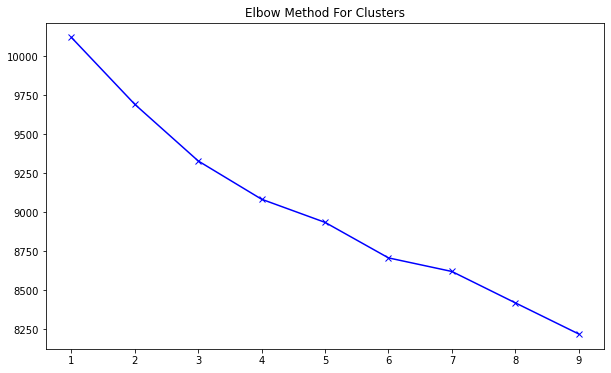

In [26]:
# Find number of clusters using the elbow method
pivotClustering = pivotedLaDF.drop('Zip', 1)
ssd = []
K = range(1,10)

for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k, random_state=1, n_init=20).fit(pivotClustering)
    ssd.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K, ssd, 'bx-')
plt.title('Elbow Method For Clusters')